# TP2 -CLASE 3

## Objetivo:
Implementar un detector de máximo enfoque sobre un video aplicando técnicas de análisis espectral similar al que utilizan lascámaras digitales modernas. El video a procesar será: “focus_video.mov”.
### 1. Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper"ImageSharpnessMeasureforBlurredImagesin FrequencyDomain“ y realizar tres experimentos:
* 1. Medición sobre todo el frame.
* 2. Medición sobre una ROI ubicada en el centro del frame. Areade la ROI = 5 o 10% del areatotal del frame.
* 3. Medición sobre una matriz de enfoque compuesta por un arreglo de NxMelementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores 3x3, 7x5, etc… (al menos 3)
Para cada experimento se debe presentar :
- Una curva o varias curvas que muestren la evolución de la métrica framea framedonde se vea claramente cuando el algoritmo detecto el punto de máximo enfoque.
- Video con la ROI o matriz, graficada en rojo y superpuesta al video original para los framesque no están en foco y verde para los framesdonde se detecta la condición de máximo enfoque.
### 2. Cambiar la métrica de enfoque eligiendo uno de los algoritmos explicados en el apéndice de: Analysis of focus measure operators in shapefrom focus.
## 1. Medicion de foco en toda la imagen
El algoritmo de detección a implementar debe detectar y devolver los puntos de máximo enfoque de manera automática.

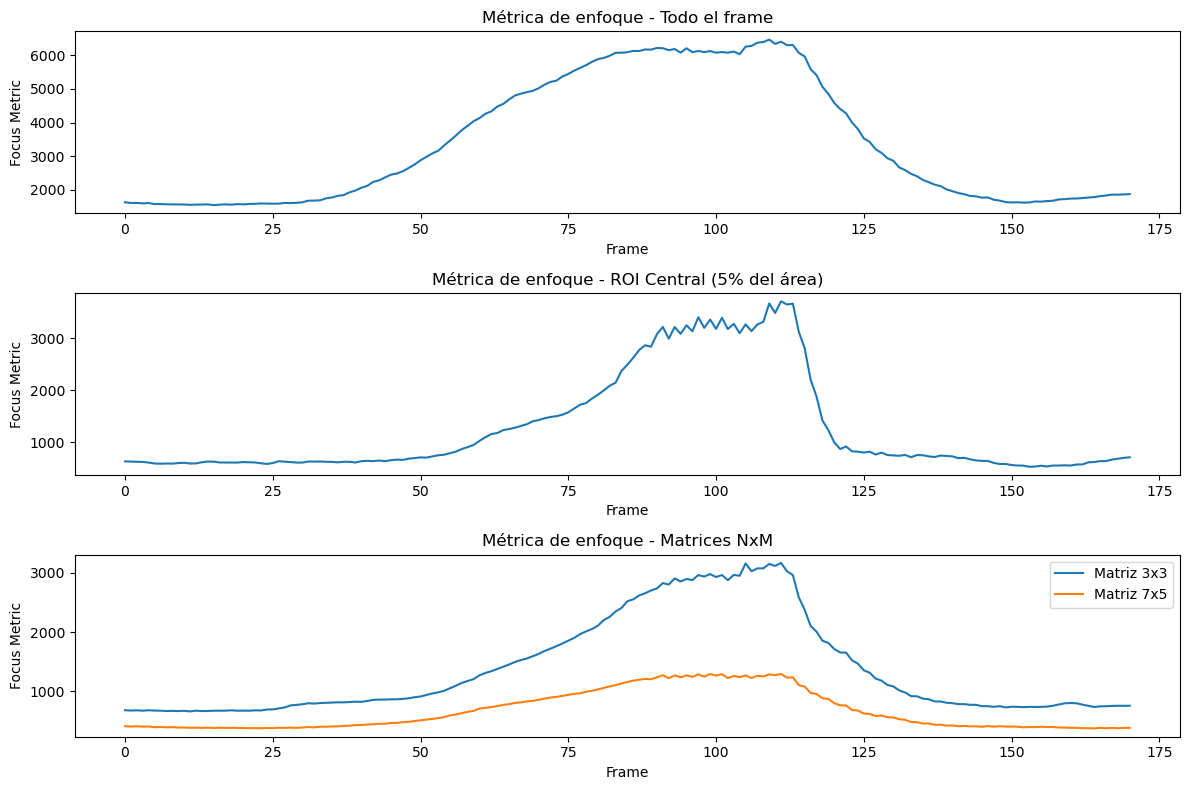

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_focus_metric(image):
    """ Calcula la métrica de enfoque basada en alta frecuencia en el dominio de Fourier """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    M = np.max(magnitude_spectrum)
    threshold = M / 1000
    high_freq_count = np.sum(magnitude_spectrum > threshold)
    return high_freq_count

def get_center_roi(image, percentage):
    """ Extrae una región central de la imagen que ocupa un porcentaje dado del área total """
    h, w, _ = image.shape
    roi_size = int(np.sqrt(percentage / 100) * min(h, w))
    x_start = (w - roi_size) // 2
    y_start = (h - roi_size) // 2
    return image[y_start:y_start + roi_size, x_start:x_start + roi_size]

def get_grid_regions(image, N, M):
    """ Divide la imagen en una cuadrícula de N filas y M columnas, devuelve cada región """
    h, w, _ = image.shape
    grid_h = h // N
    grid_w = w // M
    regions = []
    for i in range(N):
        for j in range(M):
            x_start = j * grid_w
            y_start = i * grid_h
            region = image[y_start:y_start + grid_h, x_start:x_start + grid_w]
            regions.append(region)
    return regions

# Cargar el video
cap = cv2.VideoCapture('focus_video.mov')
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Configuración para los experimentos
roi_percentage = 5  # Porcentaje del área total para la ROI central
grid_sizes = [(3, 3), (7, 5)]  # Tamaños de matrices para la cuadrícula NxM

# Almacenar las métricas
metrics_full_frame = []
metrics_roi = []
metrics_grid = {grid: [] for grid in grid_sizes}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # --- Experimento 1: Métrica para todo el frame ---
    metric_full = calculate_focus_metric(frame)
    metrics_full_frame.append(metric_full)
    
    # --- Experimento 2: Métrica para una ROI central ---
    roi = get_center_roi(frame, roi_percentage)
    metric_roi = calculate_focus_metric(roi)
    metrics_roi.append(metric_roi)
    
    # --- Experimento 3: Métrica para una matriz NxM ---
    for grid in grid_sizes:
        N, M = grid
        regions = get_grid_regions(frame, N, M)
        avg_metric_grid = np.mean([calculate_focus_metric(region) for region in regions])
        metrics_grid[grid].append(avg_metric_grid)

    # Mostrar frame con visualización de la ROI y las regiones de la matriz
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Graficar la evolución de las métricas
plt.figure(figsize=(12, 8))

# Métrica para todo el frame
plt.subplot(3, 1, 1)
plt.plot(metrics_full_frame, label="Full Frame")
plt.title('Métrica de enfoque - Todo el frame')
plt.xlabel('Frame')
plt.ylabel('Focus Metric')

# Métrica para la ROI
plt.subplot(3, 1, 2)
plt.plot(metrics_roi, label=f"ROI {roi_percentage}%")
plt.title(f'Métrica de enfoque - ROI Central ({roi_percentage}% del área)')
plt.xlabel('Frame')
plt.ylabel('Focus Metric')

# Métrica para la matriz NxM
for grid in grid_sizes:
    plt.subplot(3, 1, 3)
    plt.plot(metrics_grid[grid], label=f"Matriz {grid[0]}x{grid[1]}")
    plt.title('Métrica de enfoque - Matrices NxM')
    plt.xlabel('Frame')
    plt.ylabel('Focus Metric')
    plt.legend()

plt.tight_layout()
plt.show()


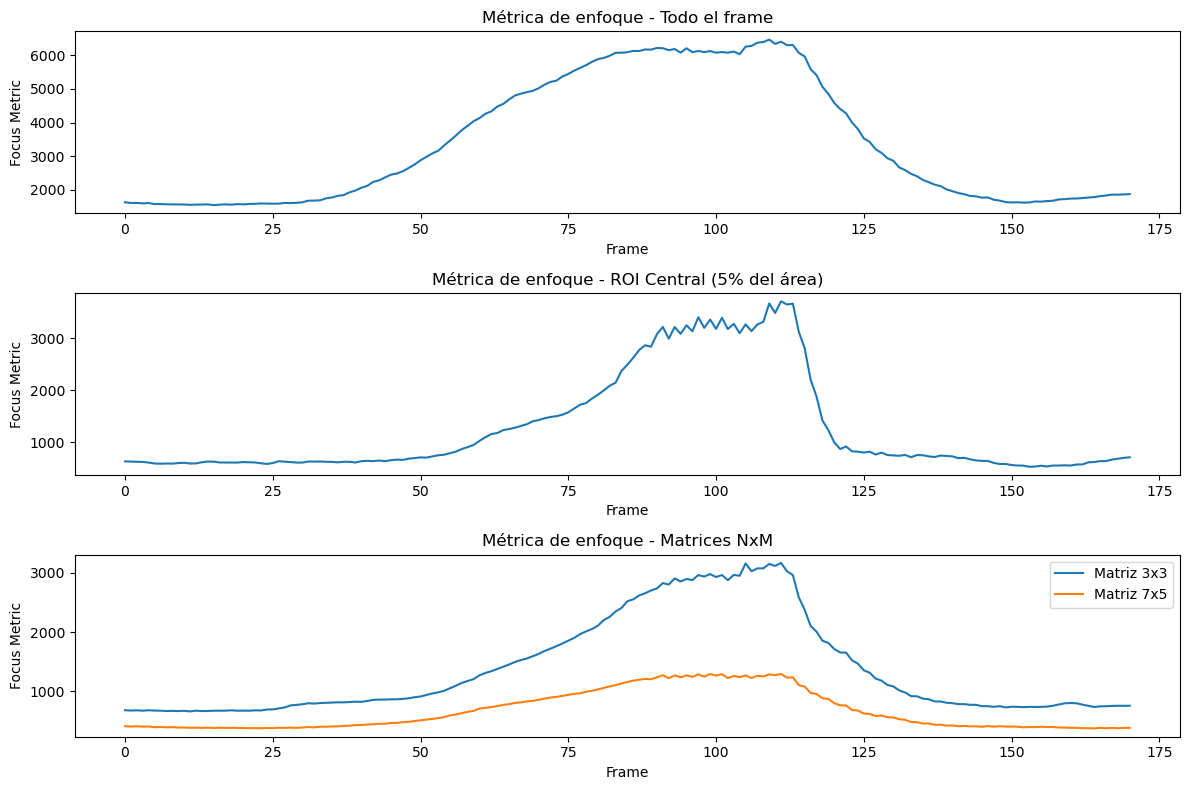

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Métrica de Fourier para enfoque
def calculate_focus_metric(image):
    """ Calcula la métrica de enfoque usando el dominio de Fourier """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    M = np.max(magnitude_spectrum)
    threshold = M / 1000
    high_freq_count = np.sum(magnitude_spectrum > threshold)
    return high_freq_count

# Métrica alternativa: Laplaciano (según paper alternativo)
def calculate_laplacian_focus(image):
    """ Calcula la métrica de enfoque usando el operador Laplaciano """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return np.var(laplacian)

# Extraer ROI central
def get_center_roi(image, percentage):
    h, w, _ = image.shape
    roi_size = int(np.sqrt(percentage / 100) * min(h, w))
    x_start = (w - roi_size) // 2
    y_start = (h - roi_size) // 2
    return image[y_start:y_start + roi_size, x_start:x_start + roi_size]

# Dividir en matriz de NxM
def get_grid_regions(image, N, M):
    h, w, _ = image.shape
    grid_h = h // N
    grid_w = w // M
    regions = []
    for i in range(N):
        for j in range(M):
            x_start = j * grid_w
            y_start = i * grid_h
            region = image[y_start:y_start + grid_h, x_start:x_start + grid_w]
            regions.append(region)
    return regions

# Mostrar ROI y matriz en el video
def draw_roi(frame, roi, in_focus):
    color = (0, 255, 0) if in_focus else (0, 0, 255)
    x, y, w, h = roi
    cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)

def draw_grid(frame, N, M, in_focus_matrix):
    h, w, _ = frame.shape
    grid_h = h // N
    grid_w = w // M
    for i in range(N):
        for j in range(M):
            x_start = j * grid_w
            y_start = i * grid_h
            color = (0, 255, 0) if in_focus_matrix[i, j] else (0, 0, 255)
            cv2.rectangle(frame, (x_start, y_start), (x_start+grid_w, y_start+grid_h), color, 2)

# Cargar el video
cap = cv2.VideoCapture('focus_video.mov')
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

roi_percentage = 5  # ROI del 5% del área total
grid_sizes = [(3, 3), (7, 5)]  # Matrices NxM para probar
laplacian_threshold = 1000  # Umbral de enfoque para el Laplaciano (ajustable)

metrics_full_frame = []
metrics_roi = []
metrics_grid = {grid: [] for grid in grid_sizes}

# Procesar cada frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # --- Experimento 1: Métrica para todo el frame ---
    metric_full = calculate_focus_metric(frame)
    metrics_full_frame.append(metric_full)
    
    # --- Experimento 2: Métrica para la ROI ---
    roi_image = get_center_roi(frame, roi_percentage)
    roi_metric = calculate_focus_metric(roi_image)
    metrics_roi.append(roi_metric)
    
    # --- Experimento 3: Métrica para matriz NxM ---
    for grid in grid_sizes:
        N, M = grid
        regions = get_grid_regions(frame, N, M)
        avg_metric_grid = np.mean([calculate_focus_metric(region) for region in regions])
        metrics_grid[grid].append(avg_metric_grid)
    
    # --- Dibujar ROI y matriz en el frame ---
    h, w, _ = frame.shape
    roi = (w//2 - roi_image.shape[1]//2, h//2 - roi_image.shape[0]//2, roi_image.shape[1], roi_image.shape[0])
    draw_roi(frame, roi, roi_metric > laplacian_threshold)
    
    for grid in grid_sizes:
        N, M = grid
        regions = get_grid_regions(frame, N, M)
        in_focus_matrix = np.array([calculate_focus_metric(region) > laplacian_threshold for region in regions]).reshape(N, M)
        draw_grid(frame, N, M, in_focus_matrix)
    
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Graficar resultados
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(metrics_full_frame, label="Full Frame")
plt.title('Métrica de enfoque - Todo el frame')
plt.xlabel('Frame')
plt.ylabel('Focus Metric')

plt.subplot(3, 1, 2)
plt.plot(metrics_roi, label=f"ROI {roi_percentage}%")
plt.title(f'Métrica de enfoque - ROI Central ({roi_percentage}% del área)')
plt.xlabel('Frame')
plt.ylabel('Focus Metric')

for grid in grid_sizes:
    plt.subplot(3, 1, 3)
    plt.plot(metrics_grid[grid], label=f"Matriz {grid[0]}x{grid[1]}")
    plt.title('Métrica de enfoque - Matrices NxM')
    plt.xlabel('Frame')
    plt.ylabel('Focus Metric')
    plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Faust\AppData\Local\Temp\ipykernel_2148\1074442056.py:16: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


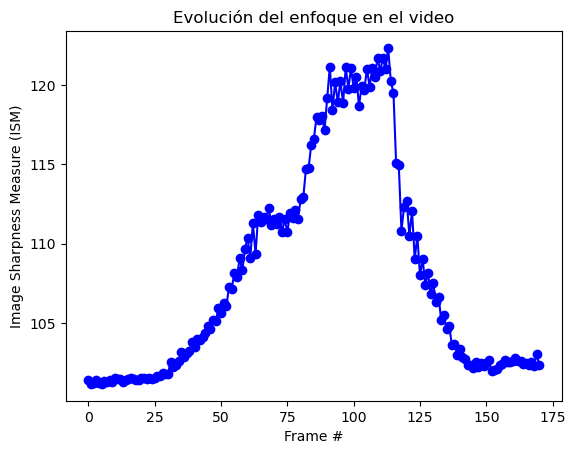

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Función para calcular la métrica de enfoque basada en la transformada de Fourier
def focus_measure(image):
    # Convertimos la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculamos la transformada de Fourier
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    
    # Magnitud del espectro
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    # Métrica propuesta
    sharpness = np.sum(magnitude_spectrum) / magnitude_spectrum.size
    return sharpness

# Función para aplicar el unsharp masking
def apply_unsharp_mask(image):
    gaussian_blur = cv2.GaussianBlur(image, (9, 9), 10.0)
    unsharp_image = cv2.addWeighted(image, 1.5, gaussian_blur, -0.5, 0)
    return unsharp_image

# Umbral para definir cuándo un frame está enfocado
FOCUS_THRESHOLD = 0.7  # Ajusta este valor según el comportamiento observado en los datos

def process_video(video_path, grid_size=(7, 7), focus_threshold=FOCUS_THRESHOLD):
    cap = cv2.VideoCapture(video_path)
    sharpness_values = []
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_count += 1
        height, width, _ = frame.shape
        grid_h, grid_w = grid_size
        step_h = height // grid_h
        step_w = width // grid_w
        
        max_focus_value = 0
        focus_detected = False
        
        # Iterar sobre la cuadrícula de NxM regiones
        for i in range(grid_h):
            for j in range(grid_w):
                x = j * step_w
                y = i * step_h
                roi = frame[y:y+step_h, x:x+step_w]
                sharpness = focus_measure(roi)
                
                color = (0, 255, 0) if sharpness > focus_threshold else (0, 0, 255)
                max_focus_value = max(max_focus_value, sharpness)
                
                # Dibujar la ROI dependiendo si está enfocada o no
                cv2.rectangle(frame, (x, y), (x + step_w, y + step_h), color, 2)
        
        # Guardar la métrica de enfoque y detectar si el frame está enfocado
        sharpness_values.append(max_focus_value)
        if max_focus_value > focus_threshold:
            focus_detected = True
        
        # Mostrar el frame
        cv2.imshow('Focus Matrix', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    
    return sharpness_values, frame_count


# Función para graficar la métrica de enfoque a lo largo de los frames
def plot_sharpness_evolution(sharpness_values, frame_count):
    frames = list(range(frame_count))
    plt.plot(frames, sharpness_values, 'bo-')
    plt.xlabel('Frame #')
    plt.ylabel('Image Sharpness Measure (ISM)')
    plt.title('Evolución del enfoque en el video')
    plt.show()

# Función principal para ejecutar los experimentos
def run_experiments(video_path):
    # 1. Medición sobre todo el frame
    sharpness_values_full_frame, frame_count = process_video(video_path, grid_size=(1, 1))
    
    # 2. Medición sobre ROI en el centro del frame (10% del área total)
    sharpness_values_roi, _ = process_video(video_path, grid_size=(10, 10))
    
    # 3. Medición sobre una matriz de NxM (ej. 7x5)
    sharpness_values_matrix, _ = process_video(video_path, grid_size=(7, 5))
    
    # Graficamos los resultados
    plot_sharpness_evolution(sharpness_values_matrix, frame_count)

# Ruta del video
video_path = "focus_video.mov"

# Ejecutamos los experimentos
run_experiments(video_path)
